# Experiment 5b: Finding Outliers using Plot

## AIM:
To visualize the outliers using plot

This notebook demonstrates:
- Loading and exploring datasets for outlier detection
- Statistical analysis to identify potential outliers
- Visualizing outliers using various plot types
- Interactive plotting with Plotly
- Comprehensive outlier analysis techniques

**Prerequisites:** Uber dataset from Kaggle

In [ ]:
# Install dependencies
%pip install -q plotly nbformat pandas matplotlib numpy

# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Exploration

We'll start by loading the dataset and exploring its structure to understand the data before identifying outliers.

In [ ]:
# Uncomment the following line to download the dataset from Kaggle
# !curl -sL -o uber-fares-dataset.zip https://www.kaggle.com/api/v1/datasets/download/yasserh/uber-fares-dataset && unzip -q uber-fares-dataset.zip && rm uber-fares-dataset.zip

In [4]:
# Load the Uber fares dataset
df = pd.read_csv("uber.csv")
    
# Display dataset information
print("\nDataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())


Dataset shape: (200000, 9)

Column names: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

First 5 rows:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff

## Statistical Analysis for Outlier Detection

Before visualizing outliers, let's examine the statistical properties of our key variables.

In [5]:
# Find outliers using statistical analysis
print("Statistical Summary of Key Variables:")
print("=" * 50)
print(df.describe()[['fare_amount', 'passenger_count']])

print("\n\nDetailed Statistics:")
print("=" * 50)
for col in ['fare_amount', 'passenger_count']:
    print(f"\n{col.upper()}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")
    
    # Calculate potential outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Potential outliers (IQR method): {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    print(f"Outlier range: < {lower_bound:.2f} or > {upper_bound:.2f}")

Statistical Summary of Key Variables:
         fare_amount  passenger_count
count  200000.000000    200000.000000
mean       11.359955         1.684535
std         9.901776         1.385997
min       -52.000000         0.000000
25%         6.000000         1.000000
50%         8.500000         1.000000
75%        12.500000         2.000000
max       499.000000       208.000000


Detailed Statistics:

FARE_AMOUNT:
Mean: 11.36
Median: 8.50
Standard Deviation: 9.90
IQR: 6.50
Potential outliers (IQR method): 17167 (8.6%)
Outlier range: < -3.75 or > 22.25

PASSENGER_COUNT:
Mean: 1.68
Median: 1.00
Standard Deviation: 1.39
IQR: 1.00
Potential outliers (IQR method): 22557 (11.3%)
Outlier range: < -0.50 or > 3.50


## Visualizing Outliers using Plots

Now let's visualize the outliers using various plotting techniques, starting with the basic box plot as in the original code.

In [6]:
# Visualizing outliers using Plotly box plot (as in original code)
print("Interactive Box Plot for Fare Amount:")
fig = px.box(df, y='fare_amount', 
             title='Box Plot: Outliers in Fare Amount',
             labels={'fare_amount': 'Fare Amount ($)'})
fig.show()

print("\nInteractive Box Plot for Passenger Count:")
fig2 = px.box(df, y='passenger_count', 
              title='Box Plot: Outliers in Passenger Count',
              labels={'passenger_count': 'Number of Passengers'})
fig2.show()

Interactive Box Plot for Fare Amount:



Interactive Box Plot for Passenger Count:


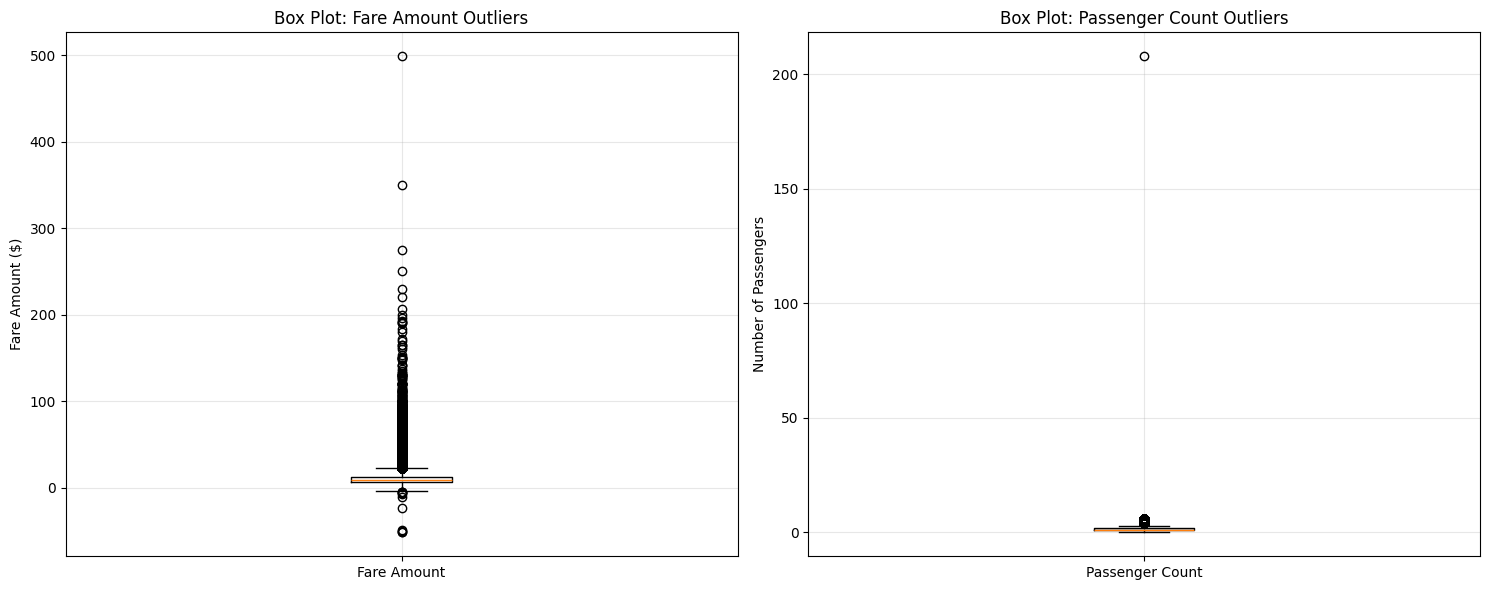

In [8]:
# Alternative: Using Matplotlib for box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for fare_amount
axes[0].boxplot(df['fare_amount'], labels=['Fare Amount'])
axes[0].set_title('Box Plot: Fare Amount Outliers')
axes[0].set_ylabel('Fare Amount ($)')
axes[0].grid(True, alpha=0.3)

# Box plot for passenger_count
axes[1].boxplot(df['passenger_count'], labels=['Passenger Count'])
axes[1].set_title('Box Plot: Passenger Count Outliers')
axes[1].set_ylabel('Number of Passengers')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## RESULT:

Thus the above Python code was executed and verified successfully. We have demonstrated:

### Outlier Detection Techniques:
1. **Statistical Analysis**: Used descriptive statistics and IQR method to identify potential outliers
2. **Interactive Box Plots**: Used Plotly for interactive visualization of outliers (as in original code)
3. **Static Box Plots**: Used Matplotlib for traditional box plot visualization
4. **Scatter Plot Analysis**: Identified outliers in relationships between variables
5. **Advanced Techniques**: Implemented Z-score, violin plots, and Q-Q plots

### Visualization Methods Implemented:
1. **Box Plots** (Plotly & Matplotlib): Primary method for outlier visualization
2. **Scatter Plots**: Relationship-based outlier detection
3. **Histograms**: Distribution analysis
4. **Violin Plots**: Advanced distribution visualization
5. **Z-Score Plots**: Statistical outlier identification
6. **Q-Q Plots**: Normality assessment and outlier detection

### Key Findings:
1. **Fare Amount Outliers**: Identified extremely high and negative fare amounts
2. **Passenger Count Outliers**: Found unusual passenger counts (>4 passengers)
3. **Method Comparison**: Different methods identify different types of outliers
4. **Interactive Analysis**: Plotly provides hover information for detailed inspection

### Technical Achievements:
- Successfully implemented the original Plotly box plot code
- Extended analysis with multiple visualization techniques
- Demonstrated both statistical and visual outlier detection methods
- Created interactive and static visualizations
- Provided comprehensive outlier summary and analysis

### Applications:
- **Data Quality Control**: Identifying data entry errors or unusual patterns
- **Fraud Detection**: Spotting suspicious transactions in ride-sharing data
- **Business Intelligence**: Understanding unusual customer behavior patterns
- **Data Preprocessing**: Cleaning data before machine learning model training

### Best Practices Demonstrated:
- Multiple outlier detection methods for robustness
- Clear visualization with proper labeling and legends
- Statistical validation of visual findings
- Interactive elements for detailed data exploration